<a href="https://colab.research.google.com/github/juunioor/COMPUTACAOVISUAL/blob/main/semana6_compvisu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Semana 6: Online - Teoria (entrega até 26/09/2023 23:59)
Atividade em grupo de até 3 pessoas.

Faça uma pesquisa sobre como é possível:

1. Realizar a limiarização de uma imagem usando Python e scikit-image.
2. Plotar o histograma de uma imagem tons de cinza usando Python, scikit-image e matplotlib.
3. Plotar o histograma de uma imagem colorida (um histograma por canal de cor) usando Python, scikit-image e matplotlib.
4. Equalizar o histograma de uma imagem usando Python e scikit-image.
5. Detectar (concluir) que uma foto está subexposta ou que está superexposta, analisando o histograma.
6. Detectar (concluir) se uma imagem está com baixo contraste ou alto contraste, analisando o histograma.

Para cada item acima, inclua um exemplo de código que exemplifica cada tarefa e uma imagem resultante do código (por exemplo, no item 2, a imagem deve conter a imagem em tons de cinza e o histograma da imagem).

Não se esqueça de incluir as referências na pesquisa.

Publique o resultado dessa atividade no seu blog.

Nesse link de tarefa do Moodle, envie um arquivo txt contendo o link do seu blog referente ao texto dessa atividade.

'\nReferência:\nhttps://acervolima.com/segmentacao-de-imagens-usando-o-modulo-scikit-image-do-python/\n'

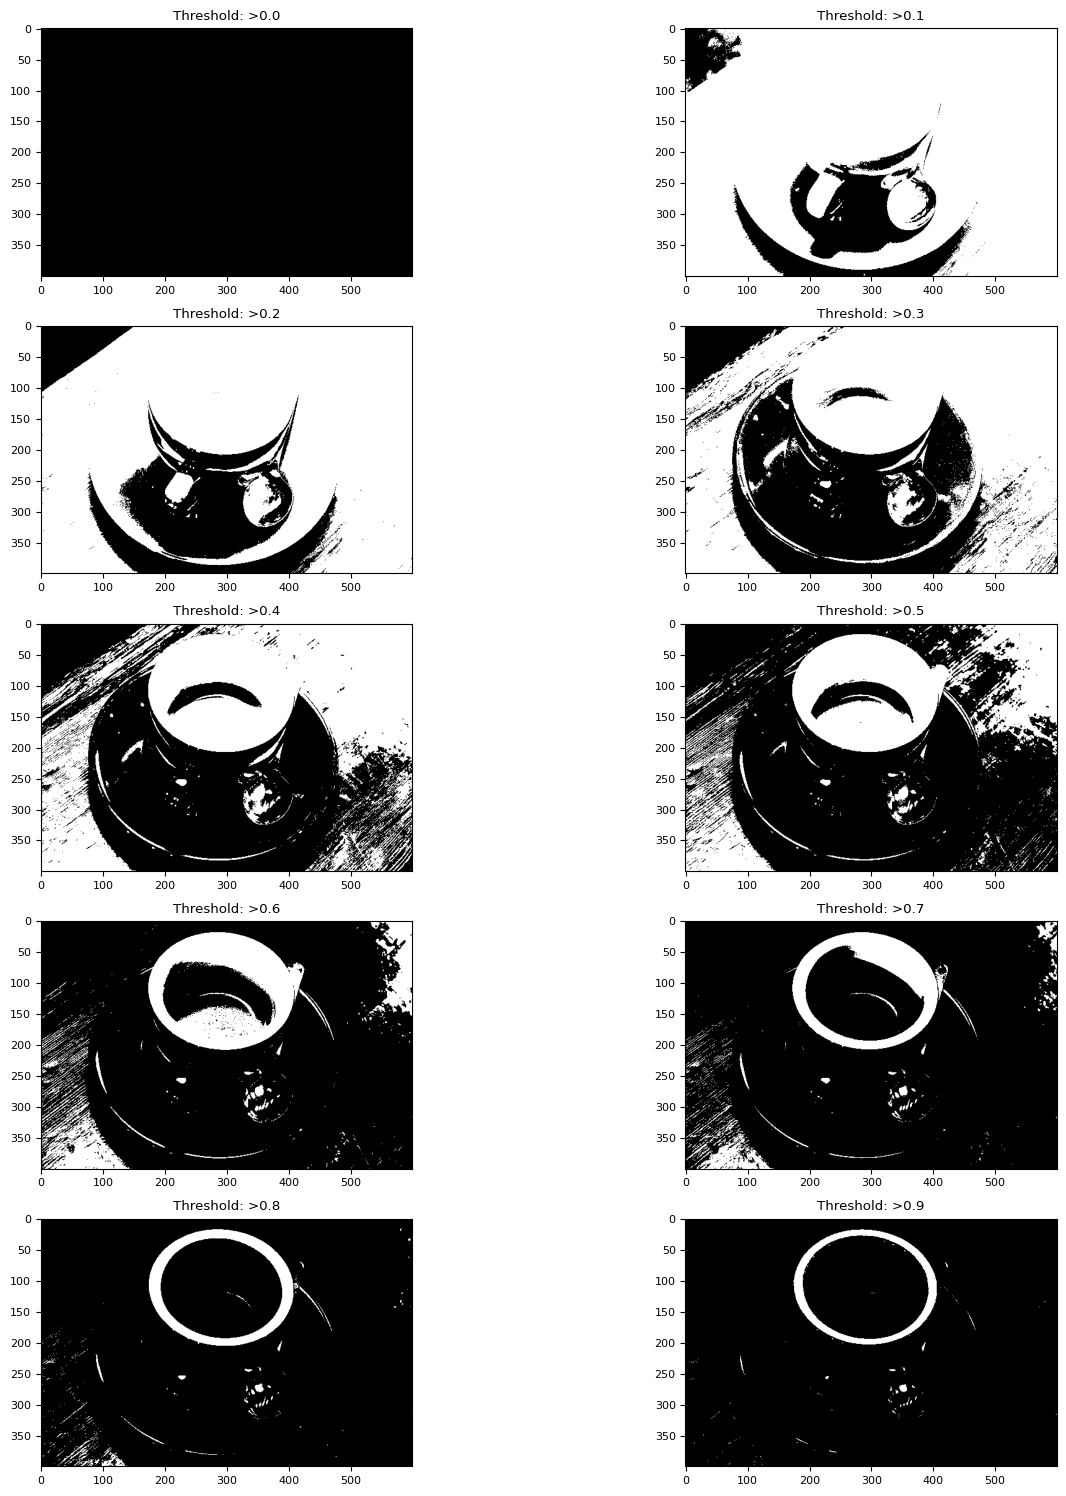

In [ ]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

for i in range(10):
  # Iterating different thresholds
  binarized_gray = (gray_coffee > i*0.1)*1
  plt.subplot(5,2,i+1)

  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))

  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')

plt.tight_layout()

'''
Referência:
https://acervolima.com/segmentacao-de-imagens-usando-o-modulo-scikit-image-do-python/
'''

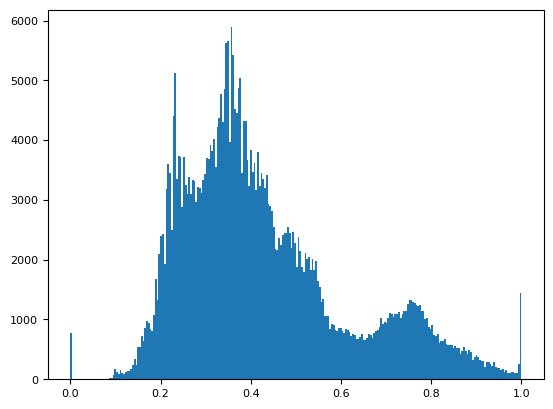

'\nReferência:\nhttps://towardsdatascience.com/histograms-in-image-processing-with-skimage-python-be5938962935\nhttps://www.nicolaromano.net/data-thoughts/scikit-image-pt-1/#ib-toc-anchor-5\n'

In [ ]:
# 2. Plotar o histograma de uma imagem tons de cinza usando Python, scikit-image e matplotlib.
# create the histogram
from skimage import io
import matplotlib.pyplot as plt

imagem = io.imread('kodim23.png', as_gray=True)
ax = plt.hist(imagem.ravel(), bins = 256)
plt.show()

'''
Referência:
https://towardsdatascience.com/histograms-in-image-processing-with-skimage-python-be5938962935
https://www.nicolaromano.net/data-thoughts/scikit-image-pt-1/#ib-toc-anchor-5
'''

'\nReferência:\nhttps://danielmuellerkomorowska.com/2020/06/17/analyzing-image-histograms-with-scikit-image/\nhttps://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_histogram_matching.html\n'

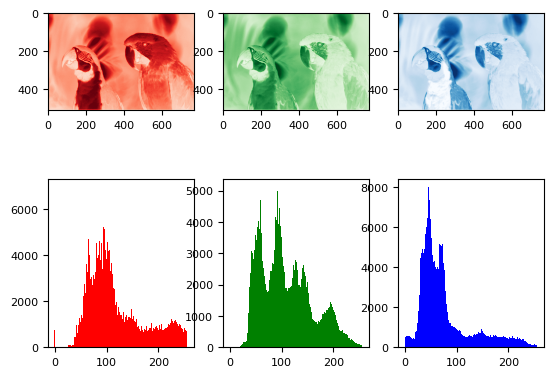

In [ ]:
# 3. Plotar o histograma de uma imagem colorida (um histograma por canal de cor) usando Python, scikit-image e matplotlib.
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt

imagem_3 = io.imread('kodim23.png')

imagem_red, imagem_green, imagem_blue = imagem_3[:,:,0], imagem_3[:,:,1], imagem_3[:,:,2]

fig, ax = plt.subplots(2,3)
ax[0,0].imshow(imagem_red, cmap="Reds")
ax[0,1].imshow(imagem_green, cmap="Greens")
ax[0,2].imshow(imagem_blue, cmap="Blues")


bins = np.arange(-0.5, 255+1,1)
ax[1,0].hist(imagem_red.flatten(), bins = bins, color='r')
ax[1,1].hist(imagem_green.flatten(), bins=bins, color='g')
ax[1,2].hist(imagem_blue.flatten(), bins=bins, color='b')

'''
Referência:
https://danielmuellerkomorowska.com/2020/06/17/analyzing-image-histograms-with-scikit-image/
https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_histogram_matching.html
'''

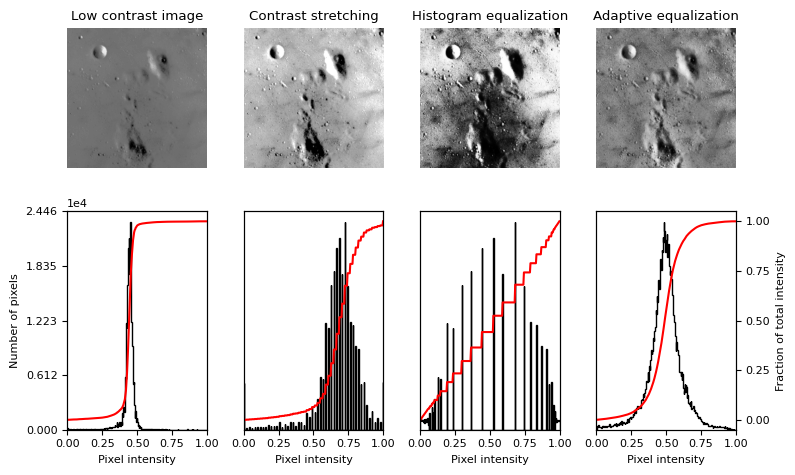

'\nhttps://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html\nhttps://www.nicolaromano.net/data-thoughts/scikit-image-pt-1/#ib-toc-anchor-5\n'

In [ ]:
# 4. Equalizar o histograma de uma imagem usando Python e scikit-image.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

'''
https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html
https://www.nicolaromano.net/data-thoughts/scikit-image-pt-1/#ib-toc-anchor-5
'''

In [ ]:
# 5. Detectar (concluir) que uma foto está subexposta ou que está superexposta, analisando o histograma.


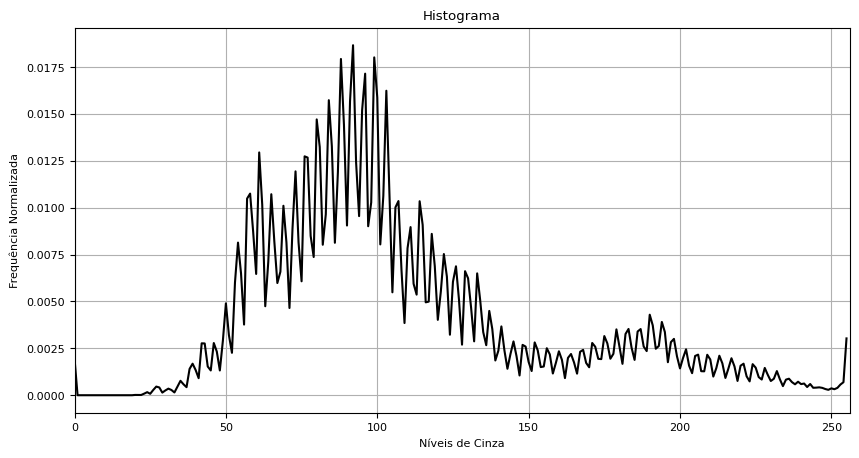

A imagem está bem exposta.


'\n[REFERÊNCIAS] Utilizado o chat GPT com o prompt: "me de um exemplo de como detectar que uma foto está subexposta ou que está superexposta, analisando o histograma em .ipynb"\n'

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Carregue a imagem
imagem = cv2.imread('kodim23.png', cv2.IMREAD_COLOR)

# Converta a imagem para escala de cinza
imagem_em_escala_de_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Calcule o histograma
histograma = cv2.calcHist([imagem_em_escala_de_cinza], [0], None, [256], [0, 256])

# Normalize o histograma (para torná-lo mais fácil de interpretar)
histograma_normalizado = histograma / histograma.sum()

# Plotar o histograma
plt.figure(figsize=(10, 5))
plt.plot(histograma_normalizado, color='black')
plt.title('Histograma')
plt.xlabel('Níveis de Cinza')
plt.ylabel('Frequência Normalizada')
plt.xlim([0, 256])
plt.grid()
plt.show()

# Verifique se a imagem está subexposta ou superexposta
# Aqui, você pode definir um limite (threshold) com base em sua análise do histograma
# Por exemplo, se a maior parte do histograma estiver à esquerda, pode ser subexposta
# Se estiver à direita, pode ser superexposta
limite = 0.05  # Você pode ajustar esse limite com base na análise do seu histograma

if histograma_normalizado[:128].sum() < limite:
    print("A imagem está subexposta.")
elif histograma_normalizado[128:].sum() < limite:
    print("A imagem está superexposta.")
else:
    print("A imagem está bem exposta.")


'''
[REFERÊNCIAS] Utilizado o chat GPT com o prompt: "me de um exemplo de como detectar que uma foto está subexposta ou que está superexposta, analisando o histograma em .ipynb"
'''

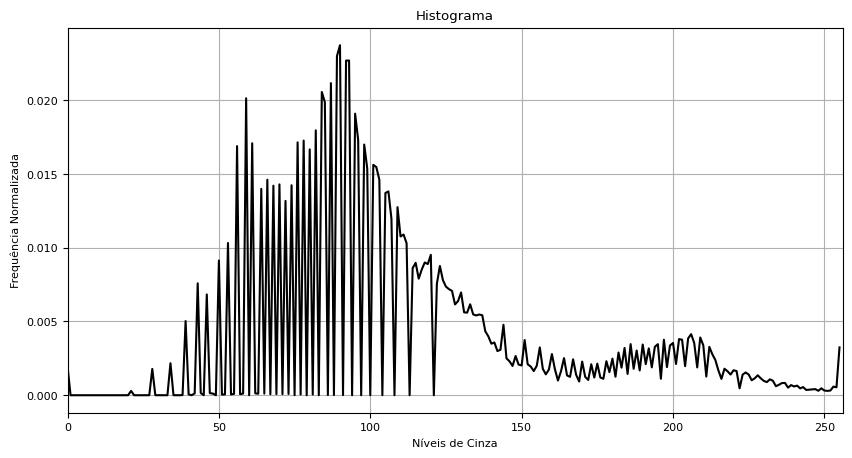

Contraste: Contraste Moderado


'\n[REFERÊNCIAS] Utilizado o chat GPT com o prompt: "me de um exemplo de como detectar se uma imagem está com baixo contraste ou alto contraste, analisando o histograma em .ipynb"\n'

In [ ]:
# 6 . Detectar (concluir) se uma imagem está com baixo contraste ou alto contraste, analisando o histograma.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregue a imagem
imagem = cv2.imread('kodim23.png', cv2.IMREAD_GRAYSCALE)

# Calcule o histograma
histograma = cv2.calcHist([imagem], [0], None, [256], [0, 256])

# Normalize o histograma
histograma_normalizado = histograma / histograma.sum()

# Calcule a média e o desvio padrão dos valores de intensidade
media = np.mean(imagem)
desvio_padrao = np.std(imagem)

# Determine o limiar para baixo contraste (você pode ajustar esse valor)
limiar_contraste_baixo = 20

# Determine o limiar para alto contraste (você pode ajustar esse valor)
limiar_contraste_alto = 100

# Defina uma função para determinar o contraste com base na média e no desvio padrão
def detectar_contraste(media, desvio_padrao, limiar_baixo, limiar_alto):
    if desvio_padrao < limiar_baixo:
        return "Baixo Contraste"
    elif desvio_padrao > limiar_alto:
        return "Alto Contraste"
    else:
        return "Contraste Moderado"

# Determine o nível de contraste da imagem
nivel_contraste = detectar_contraste(media, desvio_padrao, limiar_contraste_baixo, limiar_contraste_alto)

# Plotar o histograma
plt.figure(figsize=(10, 5))
plt.plot(histograma_normalizado, color='black')
plt.title('Histograma')
plt.xlabel('Níveis de Cinza')
plt.ylabel('Frequência Normalizada')
plt.xlim([0, 256])
plt.grid()
plt.show()

# Exibir o resultado
print(f"Contraste: {nivel_contraste}")

'''
[REFERÊNCIAS] Utilizado o chat GPT com o prompt: "me de um exemplo de como detectar se uma imagem está com baixo contraste ou alto contraste, analisando o histograma em .ipynb"
'''